# Boston.csv Dataset

This exercise relates to the Boston data set, which can be found in the file Boston.csv on the book website. It containts variables related to social neighborhood metrics

Libraries we need are imported first

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

Data used in this exercise is stored in the DATA folder

In [111]:
data_path = '../../DATA/boston.csv'

The dataframe is created using the .read_csv function of Pandas

In [114]:
boston = pd.read_csv(data_path)

The original CSV file is structured as a dataframe with the corresponding categories

In [117]:
boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [119]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


Where: 

- crim: per capita crime rate by town.
- zn: proportion of residential land zoned for lots over 25,000 sq.ft.
- indus: proportion of non-retail business acres per town.
- chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox: nitrogen oxides concentration (parts per 10 million).
- rm: average number of rooms per dwelling.
- age: proportion of owner-occupied units built prior to 1940.
- dis: weighted mean of distances to five Boston employment centres.
- rad: index of accessibility to radial highways.
- tax: full-value property-tax rate per 10,000.
- ptratio: pupil-teacher ratio by town.
- lstat: lower status of the population (percent).
- medv: median value of owner-occupied homes in $1000s.

/var/folders/42/4grwdj956wxfq8phsmjtnjdm0000gn/T/ipykernel_31301/832664401.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax = pd.plotting.scatter_matrix(boston[['crim', 'zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','lstat','medv']],ax=ax);


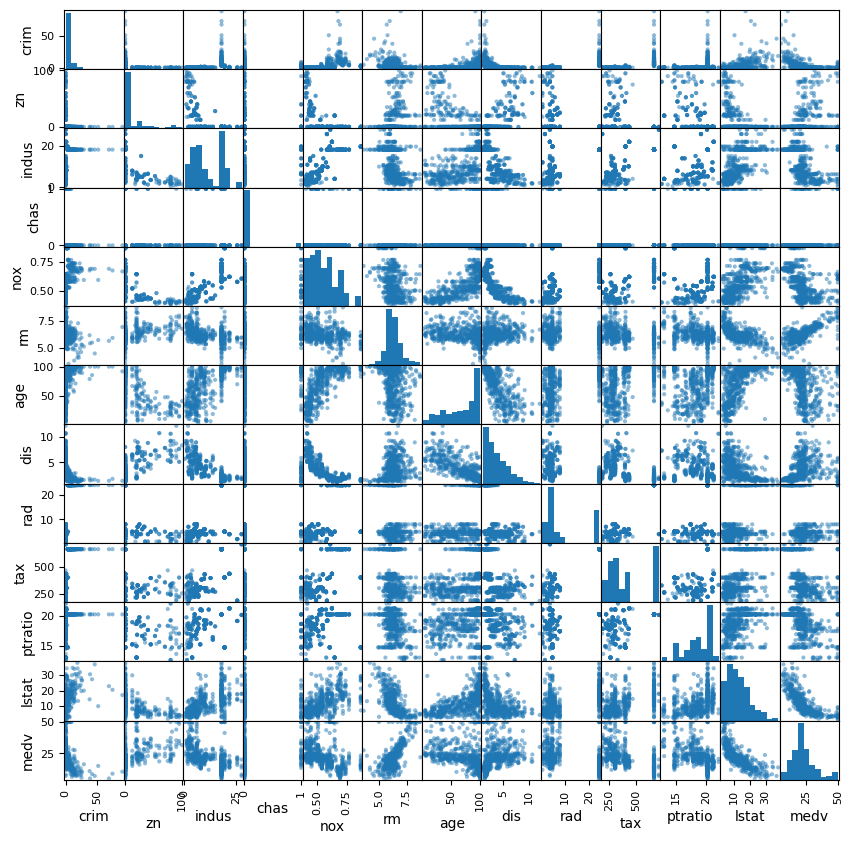

In [122]:
fig, ax = pl.subplots(figsize=(10, 10)) 
ax = pd.plotting.scatter_matrix(boston[['crim', 'zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','lstat','medv']],ax=ax);

We now refine to the predictors that seem to have correlation with crime rate

/var/folders/42/4grwdj956wxfq8phsmjtnjdm0000gn/T/ipykernel_31301/3737013996.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax = pd.plotting.scatter_matrix(boston[['crim','nox','age','dis','lstat','medv']],ax=ax);


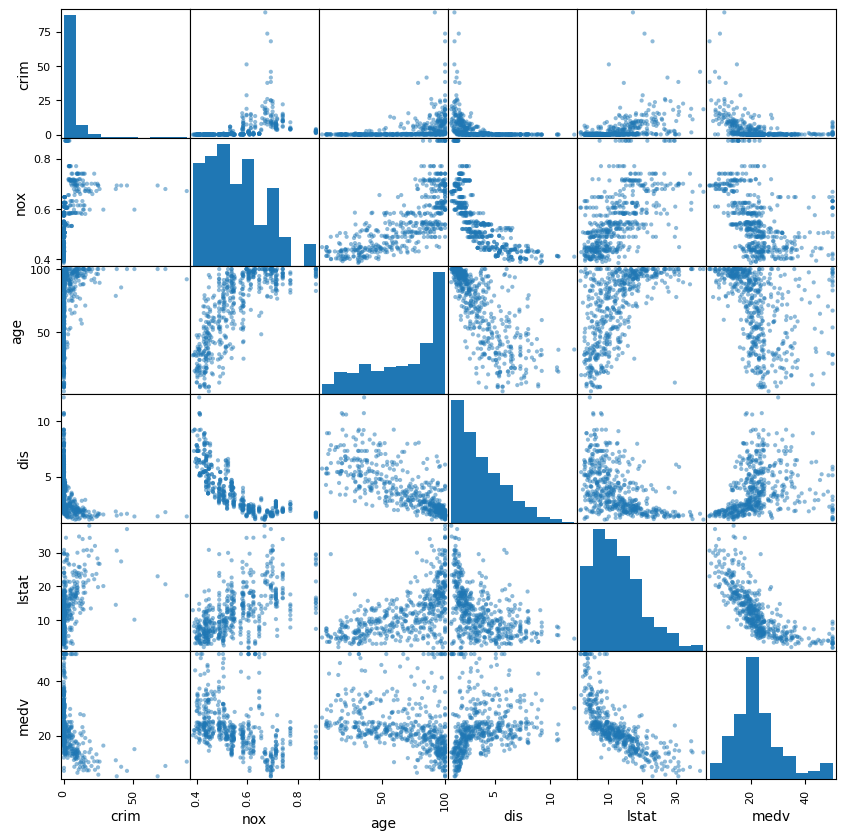

In [124]:
fig, ax = pl.subplots(figsize=(10, 10)) 
ax = pd.plotting.scatter_matrix(boston[['crim','nox','age','dis','lstat','medv']],ax=ax);

High crime rate

In [126]:
boston[['crim', 'tax','ptratio']].describe()

,crim,tax,ptratio
count,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534
std,8.601545,168.537116,2.164946
min,0.006320,187.000000,12.600000
25%,0.082045,279.000000,17.400000
50%,0.256510,330.000000,19.050000
75%,3.677083,666.000000,20.200000
max,88.976200,711.000000,22.000000


Filter with stat criteria

In [131]:
themin = boston['crim'].min()
themax = boston['crim'].max()
threshold = boston['crim'].mean() + 2 * boston['crim'].std()
boston['HighCrime'] = pd.cut(boston['crim'], [themin,threshold,themax],labels=['No', 'Yes'])
boston['HighCrime'].value_counts()

HighCrime
No     489
Yes     16
Name: count, dtype: int64

How many towns set bound the Charles River

In [134]:
boston_bound = boston[boston['chas'] == 1] 
boston_bound.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 142 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  35 non-null     int64   
 1   crim        35 non-null     float64 
 2   zn          35 non-null     float64 
 3   indus       35 non-null     float64 
 4   chas        35 non-null     int64   
 5   nox         35 non-null     float64 
 6   rm          35 non-null     float64 
 7   age         35 non-null     float64 
 8   dis         35 non-null     float64 
 9   rad         35 non-null     int64   
 10  tax         35 non-null     int64   
 11  ptratio     35 non-null     float64 
 12  lstat       35 non-null     float64 
 13  medv        35 non-null     float64 
 14  HighCrime   35 non-null     category
dtypes: category(1), float64(10), int64(4)
memory usage: 4.3 KB


Lowest median value of owner-occupied homes

In [137]:
boston['age'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: age, dtype: float64

In [139]:
boston_age = boston[boston['age'] == boston['age'].min()]
boston_age

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,HighCrime
41,42,0.12744,0.0,6.91,0,0.448,6.77,2.9,5.7209,3,233,17.9,4.84,26.6,No


Position of the town 41 in the context of all the other predictors 

In [142]:
boston_age['crim'].tolist()[0]

0.12744

In [144]:
boston['Crime41'] = pd.cut(boston['crim'], [boston['crim'].min(),boston_age['crim'].tolist()[0],boston['crim'].max()],labels=['Below', 'Above'])
boston['Crime41'].value_counts()

Crime41
Above    326
Below    179
Name: count, dtype: int64

Horsepower and Weight seem to have some correlation with MPG

In [147]:
boston['Medv41'] = pd.cut(boston['medv'], [boston['medv'].min(),boston_age['medv'].tolist()[0],boston['medv'].max()],labels=['Below', 'Above'])
boston['Medv41'].value_counts()

Medv41
Below    390
Above    114
Name: count, dtype: int64

In [149]:
boston_8 = boston[boston['rm'] > 8] 
boston_8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 97 to 364
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  13 non-null     int64   
 1   crim        13 non-null     float64 
 2   zn          13 non-null     float64 
 3   indus       13 non-null     float64 
 4   chas        13 non-null     int64   
 5   nox         13 non-null     float64 
 6   rm          13 non-null     float64 
 7   age         13 non-null     float64 
 8   dis         13 non-null     float64 
 9   rad         13 non-null     int64   
 10  tax         13 non-null     int64   
 11  ptratio     13 non-null     float64 
 12  lstat       13 non-null     float64 
 13  medv        13 non-null     float64 
 14  HighCrime   13 non-null     category
 15  Crime41     13 non-null     category
 16  Medv41      13 non-null     category
dtypes: category(3), float64(10), int64(4)
memory usage: 1.9 KB


In [151]:
boston_8.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,232.307692,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,60.915768,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,98.000000,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,225.000000,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,233.000000,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,258.000000,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,365.000000,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000
